In [33]:
#!rm COVID-19-geographic-disbtribution-worldwide.xlsx
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-07-21 16:41:57--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.223.117, 13.227.223.83, 13.227.223.89, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.223.117|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [34]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [35]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-07-21   21      7  2020    140       5             Afghanistan    AF   
1 2020-07-20   20      7  2020    174      17             Afghanistan    AF   
2 2020-07-19   19      7  2020     12      17             Afghanistan    AF   
3 2020-07-18   18      7  2020    219      32             Afghanistan    AF   
4 2020-07-17   17      7  2020     76      21             Afghanistan    AF   
5 2020-07-16   16      7  2020    254      49             Afghanistan    AF   
6 2020-07-15   15      7  2020    285      33             Afghanistan    AF   
7 2020-07-14   14      7  2020      4       2             Afghanistan    AF   
8 2020-07-13   13      7  2020      0       0             Afghanistan    AF   
9 2020-07-12   12      7  2020     85      16             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  \
0                  AFG   38041757.0         Asia   
1                  AFG   38041757.0         Asia   
2                  AFG   38041757.0         Asia   
3                  AFG   38041757.0         Asia   
4                  AFG   38041757.0         Asia   
5                  AFG   38041757.0         Asia   
6                  AFG   38041757.0         Asia   
7                  AFG   38041757.0         Asia   
8                  AFG   38041757.0         Asia   
9                  AFG   38041757.0         Asia   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                           5.864608           
1                                           6.634814           
2                                           6.910827           
3                                           7.794067           
4                                           8.012248           
5                                           8.301404           
6                                           8.472269           
7                                           8.456497           
8                                           9.158357           
9                                          10.081028

Last check of our source dataframe.

In [36]:
df.count()

dateRep                                                       31176
day                                                           31176
month                                                         31176
year                                                          31176
cases                                                         31176
deaths                                                        31176
countriesAndTerritories                                       31176
geoId                                                         31176
countryterritoryCode                                          31112
popData2019                                                   31112
continentExp                                                  31176
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    28395
dtype: int64

We pivot to a country by column format.

In [37]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                             \
geoId         AD     AE     AF   AG   AI     AL     AM    AO      AR     AT   
dateRep                                                                       
2019-12-31   NaN    0.0    0.0  NaN  NaN    NaN    0.0   NaN     NaN    0.0   
2020-01-01   NaN    0.0    0.0  NaN  NaN    NaN    0.0   NaN     NaN    0.0   
2020-01-02   NaN    0.0    0.0  NaN  NaN    NaN    0.0   NaN     NaN    0.0   
2020-01-03   NaN    0.0    0.0  NaN  NaN    NaN    0.0   NaN     NaN    0.0   
2020-01-04   NaN    0.0    0.0  NaN  NaN    NaN    0.0   NaN     NaN    0.0   
...          ...    ...    ...  ...  ...    ...    ...   ...     ...    ...   
2020-07-17  15.0  281.0   76.0  0.0  0.0   99.0  554.0  31.0  7860.0  153.0   
2020-07-18   3.0  293.0  219.0  2.0  0.0   55.0  442.0  31.0  4531.0  138.0   
2020-07-19   0.0  289.0   12.0  0.0  0.0  102.0  461.0  49.0     0.0  102.0   
2020-07-20   0.0  211.0  174.0  0.0  0.0   82.0  415.0  18.0  3223.0   63.0   
2020-07-21   4.0  271.0  140.0  0.0  0.0   81.0  104.0  44.0  8250.0  108.0   

            ... deaths                                                   
geoId       ...     VC   VE   VG   VI   VN    XK   YE     ZA    ZM   ZW  
dateRep     ...                                                          
2019-12-31  ...    NaN  NaN  NaN  NaN  0.0   NaN  NaN    NaN   NaN  NaN  
2020-01-01  ...    NaN  NaN  NaN  NaN  0.0   NaN  NaN    NaN   NaN  NaN  
2020-01-02  ...    NaN  NaN  NaN  NaN  0.0   NaN  NaN    NaN   NaN  NaN  
2020-01-03  ...    NaN  NaN  NaN  NaN  0.0   NaN  NaN    NaN   NaN  NaN  
2020-01-04  ...    NaN  NaN  NaN  NaN  0.0   NaN  NaN    NaN   NaN  NaN  
...         ...    ...  ...  ...  ...  ...   ...  ...    ...   ...  ...  
2020-07-17  ...    0.0  4.0  0.0  0.0  0.0   0.0  5.0  216.0   0.0  3.0  
2020-07-18  ...    0.0  3.0  0.0  0.0  0.0  12.0  2.0  135.0  27.0  1.0  
2020-07-19  ...    0.0  3.0  0.0  0.0  0.0   6.0  3.0  144.0   0.0  1.0  
2020-07-20  ...    0.0  2.0  0.0  0.0  0.0   5.0  2.0   85.0   0.0  0.0  
2020-07-21  ...    0.0  4.0  0.0  0.0  0.0   4.0  2.0  140.0  11.0  1.0  

[204 rows x 420 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add three months and check our latest date.

In [38]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.min() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ..   
2020-12-26   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-27   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-28   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-29   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-30   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
...         ..  ...  ..  ..  ..  ..  ..  
2020-12-26 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-27 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-28 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-29 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-30 NaN  NaN NaN NaN NaN NaN NaN  

[366 rows x 420 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since January 1st, 2019. To access the date values in the index easily, we first create a separate column.

In [39]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    366.000000
mean     182.500000
std      105.799338
min        0.000000
25%       91.250000
50%      182.500000
75%      273.750000
max      365.000000
Name: daynum, dtype: float64

Now for some modeling! The _curve_ can also be interpreted as a smoothed version of the new arriving cases, because using the sum over the last 14 days is just the mean times 14. It was first assumed to have the general shape of a Gaussian curve, based on the underlying probability distribution of the disease spread. Gaussian curves have the nice property that the logarithm is a parabola, as we can check for a couple of countries.

In [40]:
df_geo['cases'][['IT', 'ES', 'FR', 'BE', 'NL']].rolling(14).sum().plot(logy=True)

Let's start with __NL__. We create a simple dataframe to contain the source values for our fitting algorithm,  with a rolling week window to smooth out the target because of the reporting cycle where many of the cases over the weekend end up in the reported data for Tuesdays and Wednesdays. To ignore the noise of early cases before the outbreak we select only those days where the number is above 17 (one in a million for __NL__) and take the logarithm.

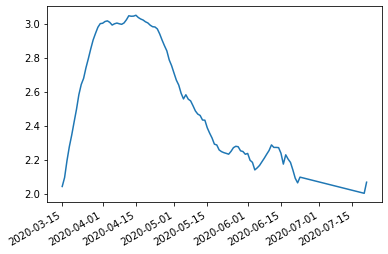

In [47]:
country  = 'NL'
measure  = 'cases'
pmeasure = 'pcases'

df_pred = pd.DataFrame({'x':df_geo['daynum'], 'y':df_geo[measure][country].rolling(7).mean()})
df_pred = df_pred[df_pred['y'] > 100]
df_pred['y'] = np.log10(df_pred['y'])
df_pred['y'].plot()

Assuming our input is now a parabola, the first derivative should be a line. We can check that with a `gradient` function.

In [48]:
df_pred['g'] = np.gradient(df_pred['y'])
df_pred['g'].plot()

With `polyfit` we check if we can fit a line.

NL factors [-0.00050155  0.06426461] residuals 0.08343114359521506


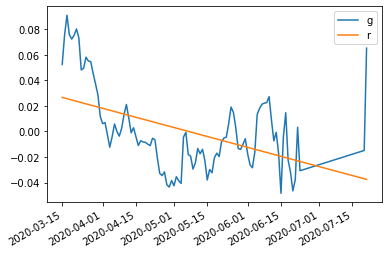

In [49]:
fit = np.polyfit(x=df_pred['x'], y=df_pred['g'], deg=1, full=True)
print(country, "factors", fit[0], "residuals", fit[1][0])

df_pred['r'] = np.polyval(fit[0], df_pred['x'])
df_pred[['g', 'r']].plot()

-0.000501551891231848 0.06426460800264626 -0.47688595141106505 3.5327290184028567e-07 9.1984007806613e-05


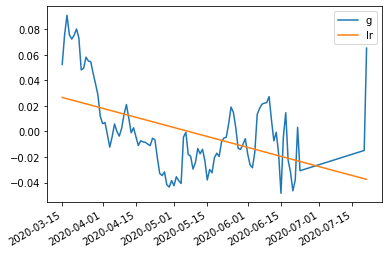

In [50]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(df_pred[['x', 'g']])
print(slope, intercept, r_value, p_value, std_err)
df_pred['lr'] = slope * df_pred['x'] + intercept
df_pred[['g', 'lr']].plot()

Now we can use polynomial regression to estimate the curve with `polyfit`. We are looking for a parabola, so we use a second order approximation. The outputs are factors a, b, and c for the function `ax^2 + bx + c`. The `polyfit` function cannot handle missing values, but they are already filtered out in the selection for `y` above.

In [51]:
fit = np.polyfit(x=df_pred['x'], y=df_pred['y'], deg=2, full=True)
print(country, "factors", fit[0], "residuals", fit[1][0])

df_pred['p'] = np.polyval(fit[0], df_pred['x'])
df_pred[['y', 'p']].plot()

NL factors [-9.59037531e-05  1.70696608e-02  2.01171733e+00] residuals 5.504890766968524


The `polyval` function takes the results of `polyfit` factors and applies them to input data. Once we have the resulting values, we take the exponential to find the estimated curve.

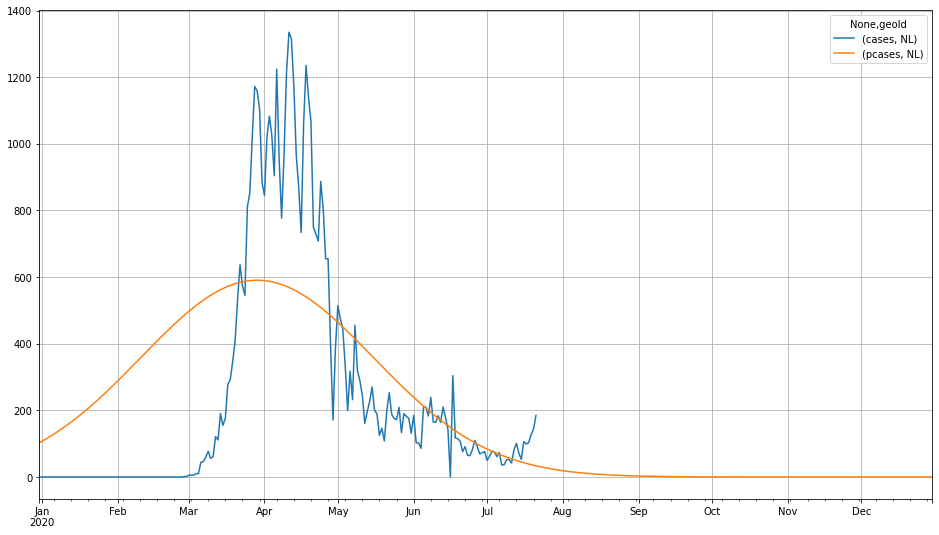

In [52]:
df_geo[(pmeasure, country)] = 10 ** np.polyval(fit[0], df_geo['daynum'])
df_geo[[(measure, country), (pmeasure, country)]].plot(figsize=(16, 9), grid=True)

Now that we have a curve fitted, we can see where the cumulative number will end up if none of our assumptions change (which is rarely the case).

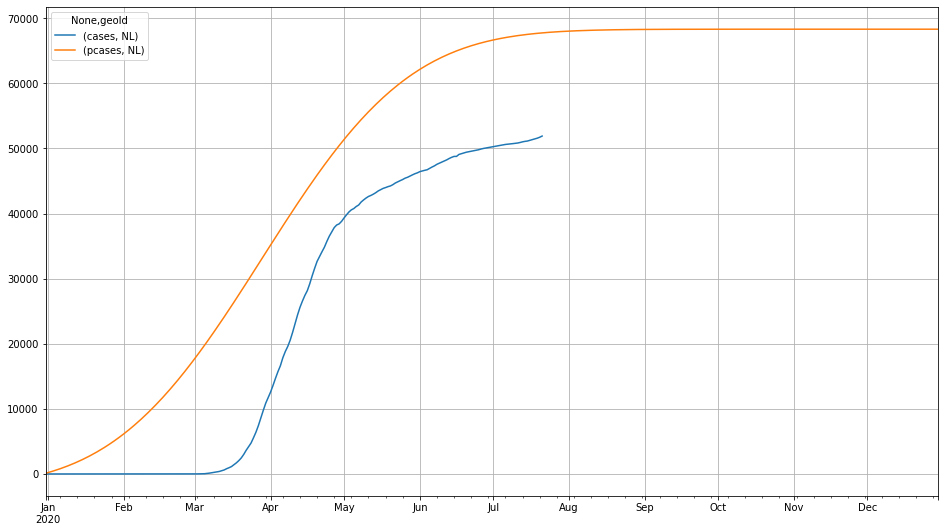

In [53]:
df_geo[[(measure, country), (pmeasure, country)]].cumsum().plot(figsize=(16, 9), grid=True)

In [54]:
df_geo[pmeasure][country].cumsum().tail(1).astype(int)

2020-12-30    68325
Freq: D, Name: NL, dtype: int64

Keep exploring! Stay home, wash your hands, keep your distance.